### Key Evaluation Metrics for Imbalanced Datasets

When dealing with imbalanced datasets, evaluating model performance using appropriate metrics is crucial. Here, we'll focus on precision, recall, F1-score, ROC-AUC, Precision-Recall AUC, and the confusion matrix.

#### Precision, Recall, and F1-Score

1. **Precision (Positive Predictive Value)**:
   Precision measures the proportion of true positives among the predicted positives.
   $$
   \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
   $$

2. **Recall (Sensitivity or True Positive Rate)**:
   Recall measures the proportion of true positives identified among the actual positives.
   $$
   \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
   $$

3. **F1-Score**:
   The F1-score is the harmonic mean of precision and recall, providing a single metric that balances both.
   $$
   \text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
   $$

The F1-score is particularly useful for imbalanced datasets as it takes both false positives and false negatives into account.

#### ROC-AUC (Receiver Operating Characteristic - Area Under Curve)

The ROC curve plots the true positive rate (recall) against the false positive rate. The AUC (Area Under the Curve) represents the probability that the model ranks a random positive instance higher than a random negative instance. Although ROC-AUC is useful, it can sometimes be misleading in highly imbalanced datasets.

#### Precision-Recall AUC

The Precision-Recall curve is more informative than the ROC curve for imbalanced datasets. The AUC for the Precision-Recall curve provides a single measure of performance that considers both precision and recall across all thresholds.

#### Confusion Matrix

A confusion matrix provides a detailed breakdown of true positives, true negatives, false positives, and false negatives, allowing you to see how well the model performs on each class. This can be particularly informative for understanding model performance on the minority class.

#### Example: Evaluating a Balanced Random Forest on an Imbalanced Dataset

Let's use Python to demonstrate these metrics on an imbalanced dataset.


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.87      0.92       189
           1       0.25      0.73      0.37        11

    accuracy                           0.86       200
   macro avg       0.62      0.80      0.65       200
weighted avg       0.94      0.86      0.89       200

Confusion Matrix:
 [[165  24]
 [  3   8]]
ROC-AUC: 0.8455988455988456
Precision-Recall AUC: 0.3473274650035988


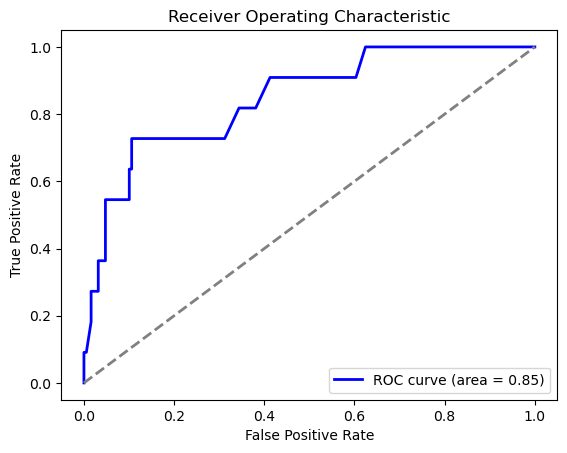

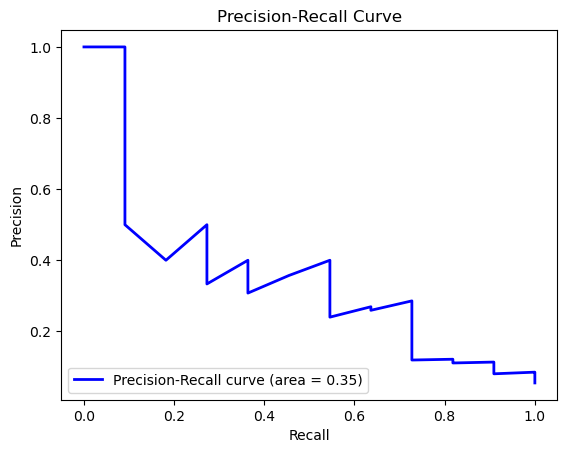

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, confusion_matrix, roc_curve

# Generate synthetic imbalanced data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.95, 0.05], random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Balanced Random Forest model
brf_model = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
brf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = brf_model.predict(X_test)
y_pred_proba = brf_model.predict_proba(X_test)[:, 1]

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC:", roc_auc)

# Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
print("Precision-Recall AUC:", pr_auc)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall Curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

### Class-Specific Metrics

#### Explanation

In imbalanced datasets, overall metrics like accuracy can be misleading. Instead, evaluating the model specifically on the minority class using precision, recall, and F1-score provides a clearer picture of performance.

#### Mathematical Concept

1. **Precision (Positive Predictive Value) for Minority Class**:
   Precision measures the proportion of true positives among the predicted positives.
   $$
   \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
   $$

2. **Recall (Sensitivity or True Positive Rate) for Minority Class**:
   Recall measures the proportion of true positives identified among the actual positives.
   $$
   \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
   $$

3. **F1-Score for Minority Class**:
   The F1-score is the harmonic mean of precision and recall, providing a single metric that balances both.
   $$
   \text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
   $$

#### Code and Example

Here's how you can evaluate a model specifically for the minority class in Python using scikit-learn:

In [2]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Generate synthetic imbalanced data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.95, 0.05], random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=["Majority Class", "Minority Class"]))

Classification Report:
                 precision    recall  f1-score   support

Majority Class       0.95      1.00      0.98       189
Minority Class       1.00      0.18      0.31        11

      accuracy                           0.95       200
     macro avg       0.98      0.59      0.64       200
  weighted avg       0.96      0.95      0.94       200



## Cross-Validation with Stratification

### Explanation

Stratified k-fold cross-validation ensures that each fold of the dataset has the same proportion of classes as the original dataset. This provides a more reliable estimate of model performance, especially for the minority class.

### Mathematical Concept

In stratified k-fold cross-validation, the dataset is partitioned into k folds such that each fold has the same class distribution as the original dataset. The model is then trained and evaluated k times, each time using a different fold as the test set and the remaining k-1 folds as the training set.

### Code and Example

Here's how you can perform stratified k-fold cross-validation in Python using scikit-learn:


In [3]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Generate synthetic imbalanced data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.95, 0.05], random_state=42)

# Create stratified k-fold cross-validator
skf = StratifiedKFold(n_splits=5)

# Initialize a list to store the F1-scores for each fold
f1_scores = []

# Perform stratified k-fold cross-validation
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the model
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate F1-score for the minority class
    f1 = f1_score(y_test, y_pred, pos_label=1)
    f1_scores.append(f1)

# Calculate the mean F1-score
mean_f1_score = np.mean(f1_scores)
print("Mean F1-Score for the minority class:", mean_f1_score)


Mean F1-Score for the minority class: 0.5995098039215685


## Cost-Sensitive Evaluation

### Explanation

In cost-sensitive evaluation, higher misclassification costs are assigned to errors on the minority class. This approach can be implemented using weighted accuracy or other cost-sensitive metrics.

### Mathematical Concept

Weighted accuracy is one example of a cost-sensitive metric:
$$
\text{Weighted Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{FP} + \text{FN} + \text{TN}}
$$
where TP, FP, FN, and TN are weighted differently based on the importance of the minority class.

### Code and Example

Here's how you can use cost-sensitive evaluation in Python:

```python


In [4]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Generate synthetic imbalanced data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.95, 0.05], random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the weights for each class
class_weights = {0: 1, 1: 5}

# Train a cost-sensitive model
model = RandomForestClassifier(class_weight=class_weights, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate weighted accuracy
weighted_accuracy = accuracy_score(y_test, y_pred, sample_weight=[class_weights[i] for i in y_test])
print("Weighted Accuracy:", weighted_accuracy)


Weighted Accuracy: 0.8319672131147541
